#Zomato Data Analysis








First Import some lib

In [4]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns

#Step 2 - Lode data

In [5]:
df=pd.read_csv('/content/Zomato data .csv')
df.head(5)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [6]:
df.isnull().sum()

,0
name,0
online_order,0
book_table,0
rate,0
votes,0
approx_cost(for two people),0
listed_in(type),0


#Convert the data type of column-rate

In [7]:
def convert_rate(value):
  value=str(value).split('/')
  value=value[0]
  return float(value)
df['rate']=df['rate'].apply(convert_rate)
df.head(5)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


#Type of resturant

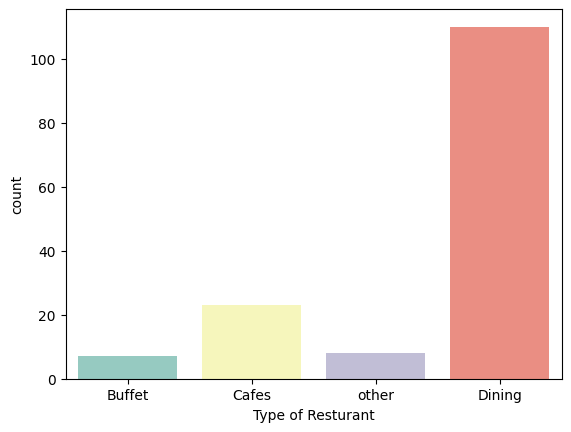

In [8]:
sns.countplot(x=df['listed_in(type)'],palette="Set3",hue=df['listed_in(type)'])
plt.xlabel('Type of Resturant')
plt.show()

###Majority of the resturant fall in dinning category

In [9]:
df.head(5)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


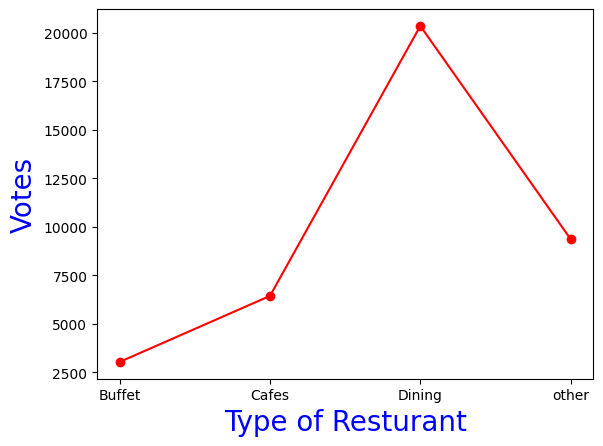

In [14]:
grouped_data=df.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes': grouped_data})
plt.plot(result,c='red',marker="o")
plt.xlabel('Type of Resturant',c='blue',size=20)
plt.ylabel('Votes',c='blue',size=20)
plt.show()


#Dinning resturants has recieved maximum votes

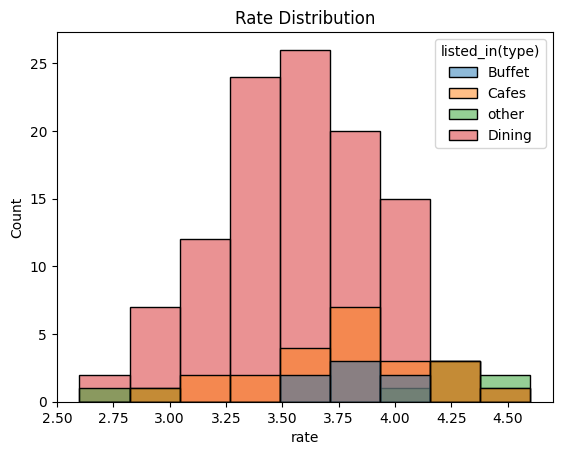

In [20]:
import seaborn as sns
sns.histplot(data=df, x='rate', hue='listed_in(type)')
plt.title('Rate Distribution')
plt.show()

#The majority resturants recevied ratings from 3.5 to 4 and most for the rating are got by dining

In [21]:
df.head(5)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<ipython-input-36-a801652091ba>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=Avg, palette="Set2")


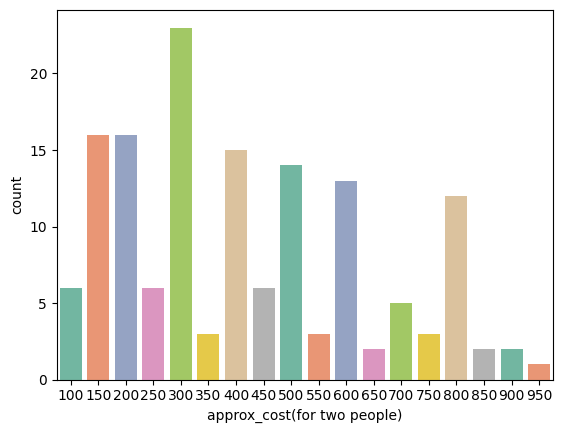

In [36]:
Avg=df['approx_cost(for two people)']
sns.countplot(x=Avg, palette="Set2")
plt.show()

#The majority of couples preffer Avg order of 300rs

<ipython-input-37-e68bcebe0db3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns .boxplot(x='online_order',y='rate' ,data=df,palette="Set1")


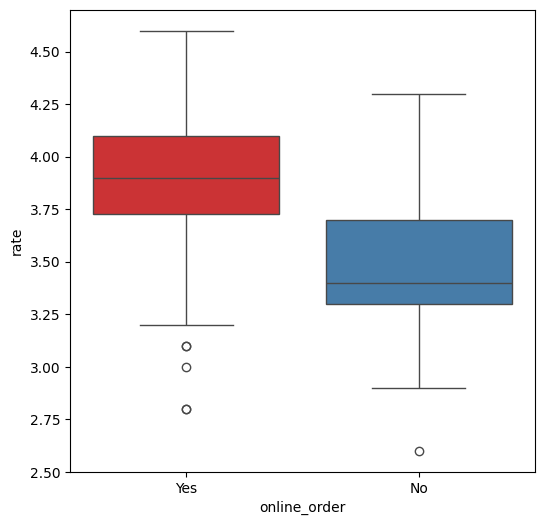

In [37]:
plt.figure(figsize=(6,6))
sns .boxplot(x='online_order',y='rate' ,data=df,palette="Set1")
plt.show()

#Offline orders recevied lower rating in comparision to online orders

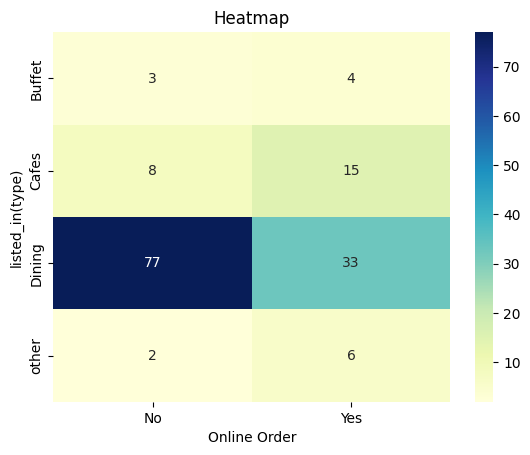

In [43]:
pk=df.pivot_table(index='listed_in(type)',columns='online_order',fill_value=0,aggfunc='size')
sns.heatmap(pk,annot=True,cmap='YlGnBu',fmt='d')
plt.title('Heatmap')
plt.xlabel("Online Order")
plt.ylabel("listed_in(type)")
plt.show()

#Dining restaurants primarily accept offline orders,whereas cafes primarily recevie online orders.This suggests that clients prefer to place orders at restaurants, but prefer online ordering at cafes.

#Thankyou